In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, label_binarize
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter


In [28]:
corpus=[]
target=[]
edad=[]
sexo=[]
severidad=[]
archivo=open("dataset_elpino.csv",encoding="utf-8")
header=archivo.readline().strip().split(";")
features=[]
for col in header:
    col=col.split("-")[0].strip()
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        col=linea[i].split("-")[0].strip()
        if i==67:
            grd=col
            target.append(grd)
            ultimoDigito=grd[5]
            severidad.append(ultimoDigito)
        elif i==66:
            sexo.append(1 if col=="Mujer" else 0)
        elif i==65:
            edad.append(int(col))
        else:
            row.append(col)
    corpus.append(row)

In [83]:
corpus[0]

['A41.8',
 'B37.6',
 'I39.8',
 'N10',
 'B96.1',
 'L89.9',
 'L08.9',
 'B96.2',
 'A41.5',
 'J86.9',
 'U07.1',
 'Y95',
 'N18.5',
 'E87.1',
 'D64.9',
 'G82.2',
 'N31.9',
 'I10',
 'K70.4',
 'F19.2',
 'F10.2',
 'E46',
 'G40.9',
 'L21.9',
 'Z93.5',
 'Z93.3',
 'Z99.2',
 'Z91.6',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '86.28',
 '34.91',
 '88.38',
 '87.41',
 '88.75',
 '88.01',
 '88.43',
 '88.41',
 '87.44',
 '99.29',
 '99.19',
 '99.18',
 '99.21',
 '99.26',
 '99.23',
 '93.94',
 '89.52',
 '90.59',
 '89.65',
 '39.95',
 '39.95',
 '99.04',
 '90.39',
 '99.84',
 '88.72',
 '90.42',
 '90.52',
 '91.39',
 '91.33',
 '87.03']

In [84]:
features

['Diag01',
 'Diag02',
 'Diag03',
 'Diag04',
 'Diag05',
 'Diag06',
 'Diag07',
 'Diag08',
 'Diag09',
 'Diag10',
 'Diag11',
 'Diag12',
 'Diag13',
 'Diag14',
 'Diag15',
 'Diag16',
 'Diag17',
 'Diag18',
 'Diag19',
 'Diag20',
 'Diag21',
 'Diag22',
 'Diag23',
 'Diag24',
 'Diag25',
 'Diag26',
 'Diag27',
 'Diag28',
 'Diag29',
 'Diag30',
 'Diag31',
 'Diag32',
 'Diag33',
 'Diag34',
 'Diag35',
 'Proced01',
 'Proced02',
 'Proced03',
 'Proced04',
 'Proced05',
 'Proced06',
 'Proced07',
 'Proced08',
 'Proced09',
 'Proced10',
 'Proced11',
 'Proced12',
 'Proced13',
 'Proced14',
 'Proced15',
 'Proced16',
 'Proced17',
 'Proced18',
 'Proced19',
 'Proced20',
 'Proced21',
 'Proced22',
 'Proced23',
 'Proced24',
 'Proced25',
 'Proced26',
 'Proced27',
 'Proced28',
 'Proced29',
 'Proced30',
 'Edad en años',
 'Sexo (Desc)',
 'GRD']

Aquí definimos el data frame

In [29]:
df=pd.DataFrame(corpus,columns=features[:-3])
df["Edad"]=edad
df["Sexo"]=sexo
df["GRD"]=target
#df["Severidad"]=severidad

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14561 entries, 0 to 14560
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Diag01    14561 non-null  object
 1   Diag02    14561 non-null  object
 2   Diag03    14561 non-null  object
 3   Diag04    14561 non-null  object
 4   Diag05    14561 non-null  object
 5   Diag06    14561 non-null  object
 6   Diag07    14561 non-null  object
 7   Diag08    14561 non-null  object
 8   Diag09    14561 non-null  object
 9   Diag10    14561 non-null  object
 10  Diag11    14561 non-null  object
 11  Diag12    14561 non-null  object
 12  Diag13    14561 non-null  object
 13  Diag14    14561 non-null  object
 14  Diag15    14561 non-null  object
 15  Diag16    14561 non-null  object
 16  Diag17    14561 non-null  object
 17  Diag18    14561 non-null  object
 18  Diag19    14561 non-null  object
 19  Diag20    14561 non-null  object
 20  Diag21    14561 non-null  object
 21  Diag22    14

In [24]:
df["GRD"].value_counts()[:30]

GRD
146101    813
146121    639
146131    538
158171    389
134161    325
071141    317
044153    287
061131    252
041023    248
146102    244
044163    229
131111    226
131201    222
054123    204
146122    187
146103    163
061201    154
044183    145
146132    140
131301    139
114121    136
044213    135
094131    134
041203    130
071142    129
214121    123
014241    121
114123    118
091401    115
064181    104
Name: count, dtype: int64

In [31]:
len(df['GRD'].unique())

526

In [32]:
df.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023


In [35]:
grds=df["GRD"].value_counts()
grdFiltro = grds[grds>100].index.tolist() # Filtramos los GRDS que tienen más de 100 casos y lo trasformamos en una lista de los que son
grdFiltro

['146101',
 '146121',
 '146131',
 '158171',
 '134161',
 '071141',
 '044153',
 '061131',
 '041023',
 '146102',
 '044163',
 '131111',
 '131201',
 '054123',
 '146122',
 '146103',
 '061201',
 '044183',
 '146132',
 '131301',
 '114121',
 '044213',
 '094131',
 '041203',
 '071142',
 '214121',
 '014241',
 '114123',
 '091401',
 '064181',
 '114122',
 '146123']

In [36]:
len(grdFiltro)

32

In [37]:
dfFiltro=df[df["GRD"].isin(grdFiltro)] # Filtramos con la lista GRDS que tengan mas de 200 casos
dfFiltro.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.04,99.18,99.19,99.21,99.26,99.29,93.01,37,1,041023
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,99.26,99.29,93.01,93.09,93.11,93.12,93.13,59,0,041023
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,88.01,88.43,87.03,88.38,87.44,45.13,45.23,77,1,041023


<Axes: xlabel='Edad'>

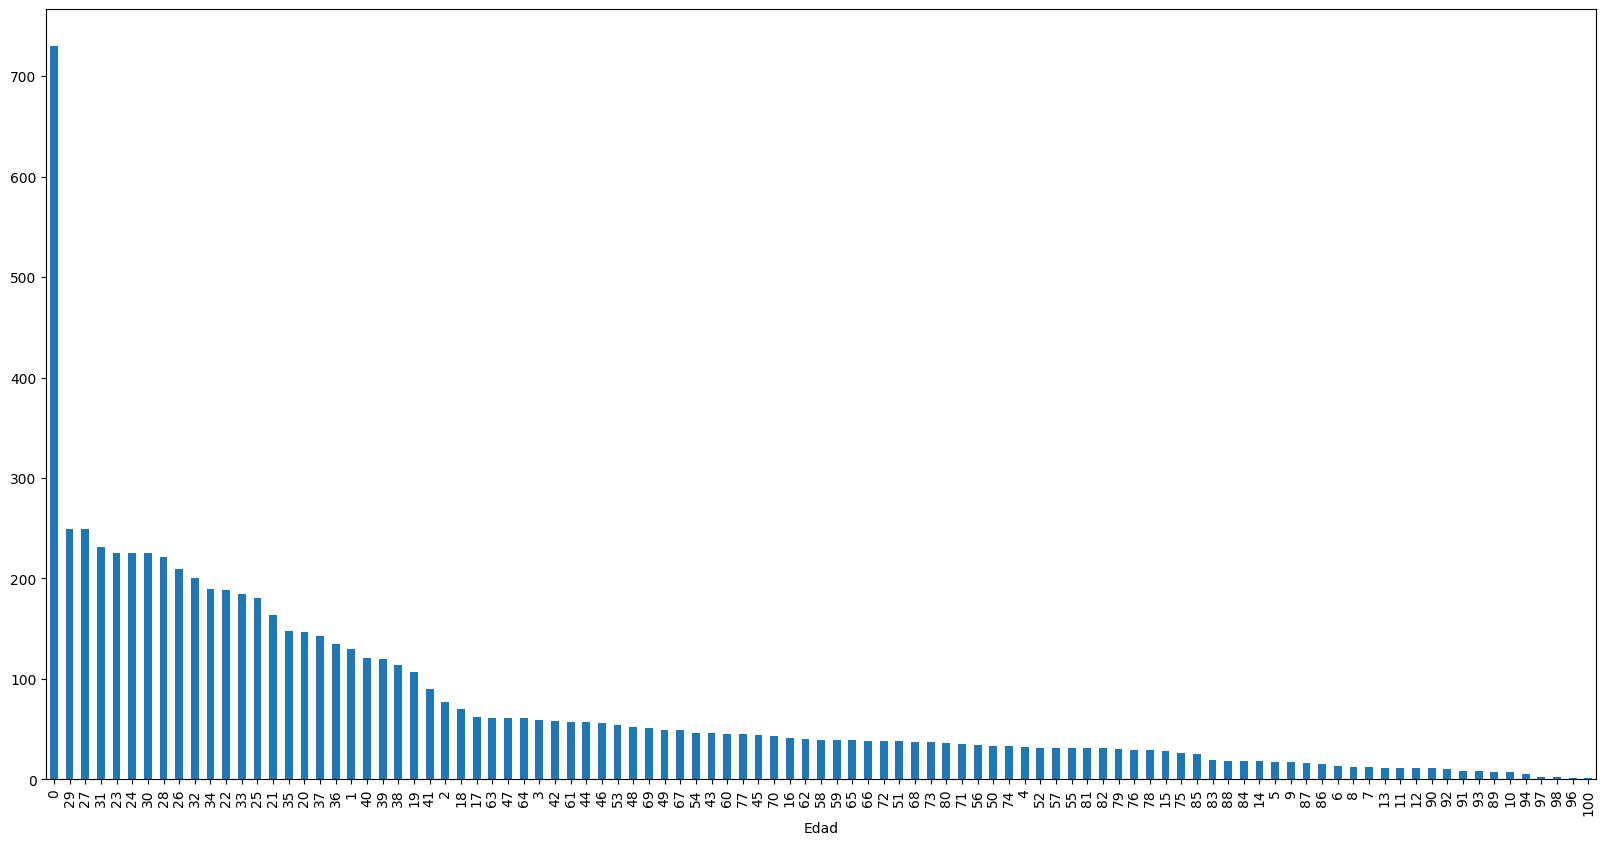

In [38]:
dfFiltro["Edad"].value_counts().plot(kind="bar", figsize=(20, 10))

<Axes: xlabel='Sexo'>

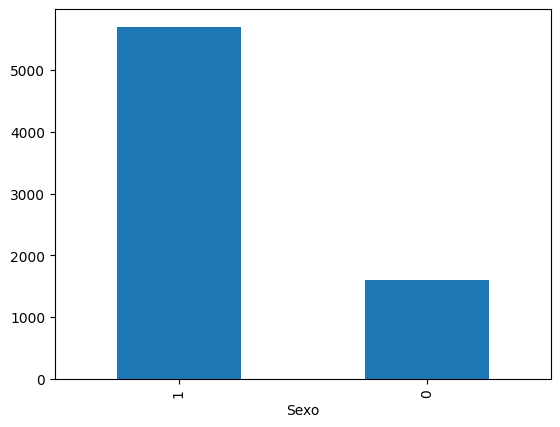

In [39]:
dfFiltro["Sexo"].value_counts().plot(kind="bar")

Contar diagnosticos y procedimientos de cada caso

<Axes: >

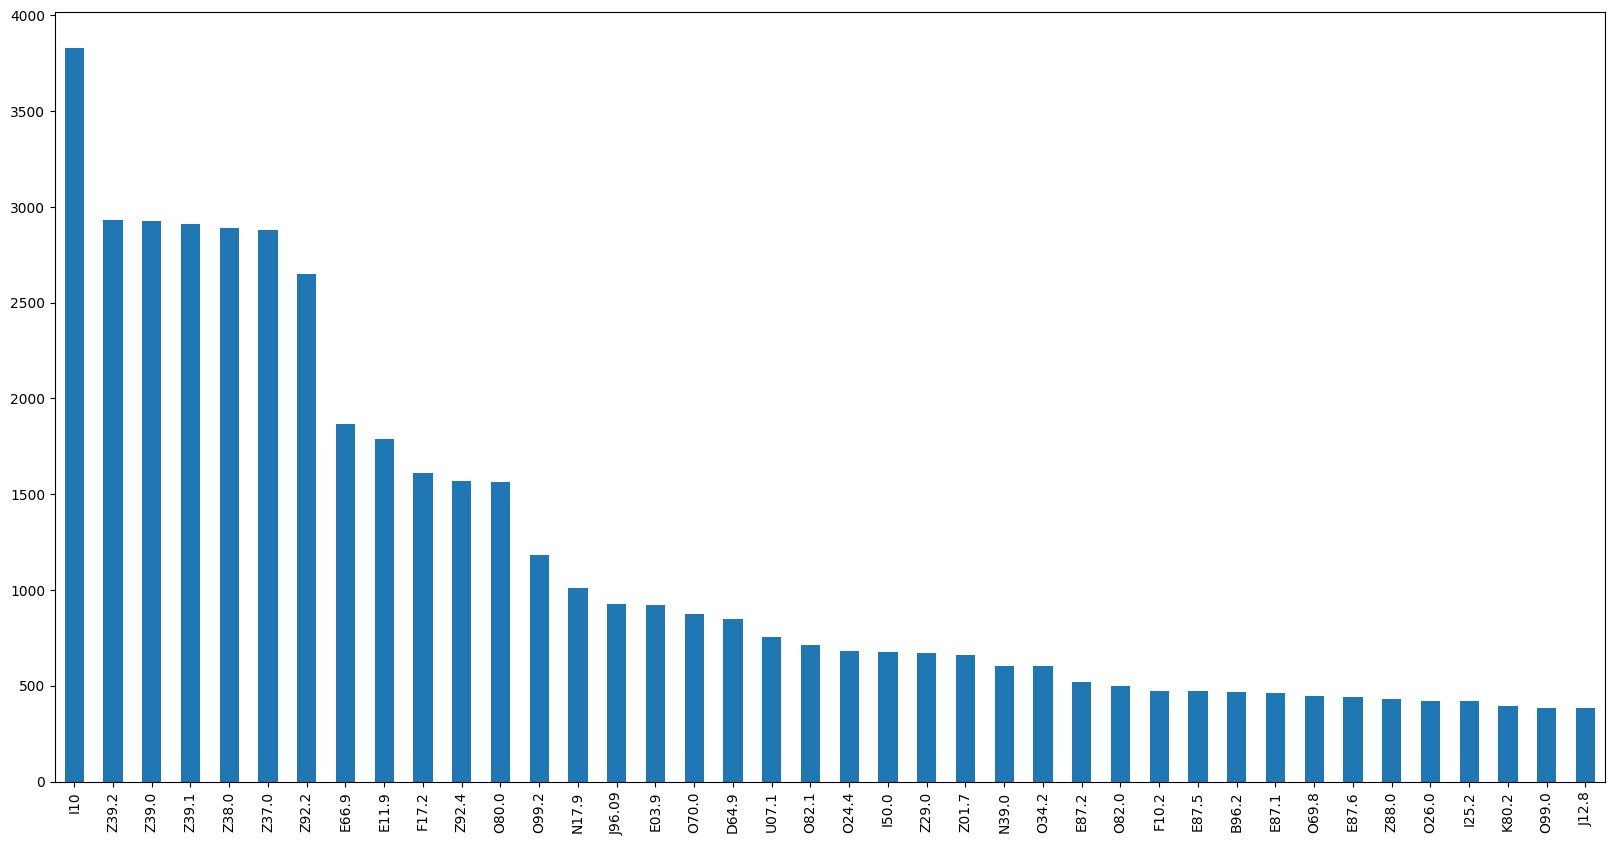

In [40]:
# Columnas de diagnóstico y procedimiento
diag_cols = [f'Diag{i:02d}' for i in range(1, 36)]  # Diag01 a Diag35
proc_cols = [f'Proced{i:02d}' for i in range(1, 31)]  # Proc01 a Proc30
# Diagnosticos con más frecuencia
conteo_diag = pd.Series(df[diag_cols].values.ravel()).loc[lambda row: (row != '') & (row != 0)]. value_counts()
conteo_diag.head(40).plot(kind='bar', figsize=(20, 10))

<Axes: >

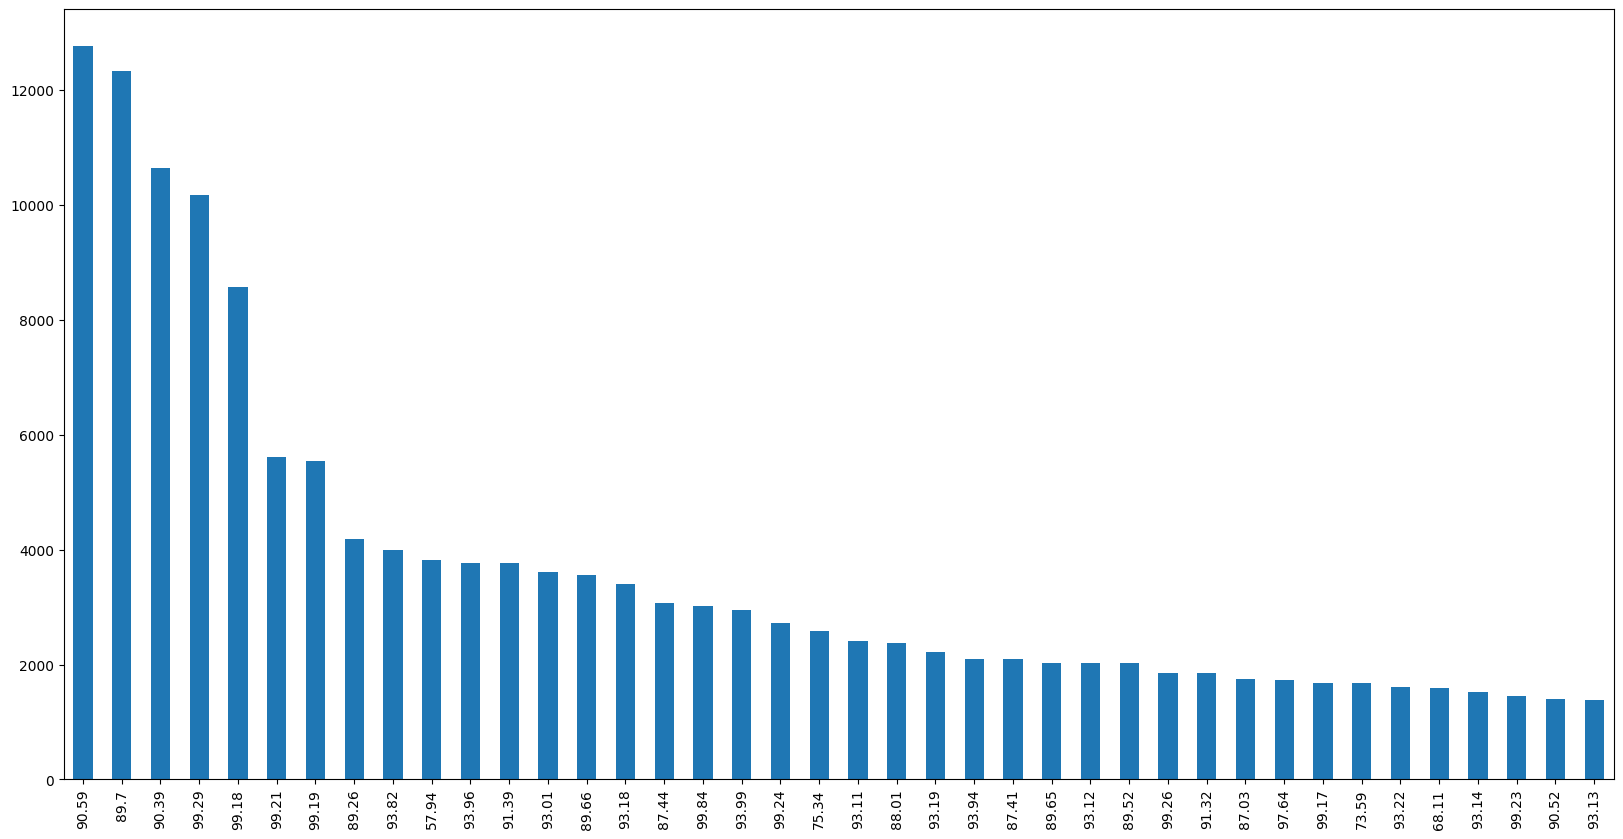

In [41]:
# Procedimientos con más frecuencia
conteo_proc= pd.Series(df[proc_cols].values.ravel()).loc[lambda row: (row != '') & (row != 0)]. value_counts()
conteo_proc.head(40).plot(kind='bar', figsize=(20, 10))

In [43]:
# Contar solo si el valor no es nulo, ni vacío, ni 0
dfFiltro['num_diag'] = dfFiltro[diag_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)
dfFiltro['num_proc'] = dfFiltro[proc_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)

C:\Users\junit\AppData\Local\Temp\ipykernel_10304\382793347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltro['num_diag'] = dfFiltro[diag_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)
C:\Users\junit\AppData\Local\Temp\ipykernel_10304\382793347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFiltro['num_proc'] = dfFiltro[proc_cols].apply(lambda row: row[(row != '') & (row != 0) & (pd.notna(row))].count(), axis=1)


In [44]:
dfFiltro.head()

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD,num_diag,num_proc
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,00.17,99.04,99.18,99.21,99.23,61,0,041023,19,30
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,91.32,93.90,99.15,96.59,45.13,30,0,041023,22,30
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.19,99.21,99.26,99.29,93.01,37,1,041023,21,30
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,93.01,93.09,93.11,93.12,93.13,59,0,041023,22,30
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,87.03,88.38,87.44,45.13,45.23,77,1,041023,14,30


<Axes: xlabel='num_diag'>

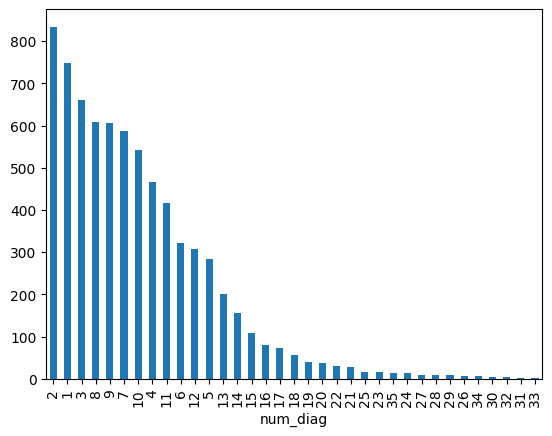

In [45]:
# Numero de diagnosticos por caso con más frecuencia
dfFiltro["num_diag"].value_counts().plot(kind="bar")

<Axes: xlabel='num_proc'>

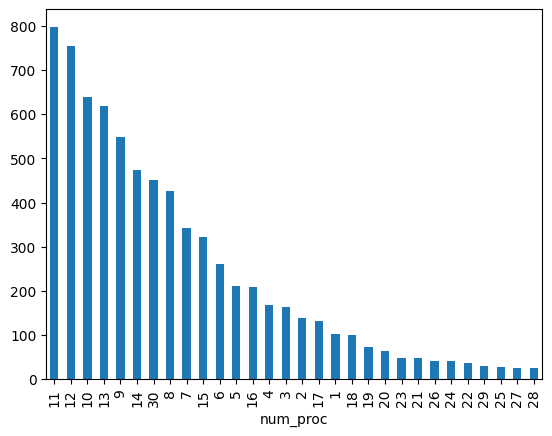

In [46]:
# Numero de procedimientos por caso con más frecuencia
dfFiltro["num_proc"].value_counts().plot(kind="bar")

In [47]:
pd.crosstab(dfFiltro["GRD"],dfFiltro["Diag01"],margins=True)

Diag01,A02.0,A04.7,A04.9,A06.0,A09.9,A15.0,A15.3,A15.6,A18.4,A37.0,...,Z35.3,Z35.4,Z43.0,Z43.2,Z43.3,Z59.7,Z60.8,Z65.3,Z76.2,All
GRD,,,,,,,,,,,,,,,,,,,,,
014241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,121
041023,0,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,248
041203,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130
044153,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,287
044163,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,229
044183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,145
044213,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,135
054123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,204
061131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,252


In [48]:
data=dfFiltro

In [49]:
data

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced26,Proced27,Proced28,Proced29,Proced30,Edad,Sexo,GRD,num_diag,num_proc
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,00.17,99.04,99.18,99.21,99.23,61,0,041023,19,30
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,91.32,93.90,99.15,96.59,45.13,30,0,041023,22,30
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.19,99.21,99.26,99.29,93.01,37,1,041023,21,30
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,93.01,93.09,93.11,93.12,93.13,59,0,041023,22,30
14,N17.0,K80.3,U07.1,J96.09,I48.0,R57.0,A41.8,B96.1,Y95,U82.2,...,87.03,88.38,87.44,45.13,45.23,77,1,041023,14,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,N10,N13.3,F14.2,F17.9,F10.9,R63.4,Z03.0,Z59.0,Z88.6,,...,,,,,,42,1,114121,9,9
14548,K80.2,I10,Z92.2,,,,,,,,...,,,,,,57,1,071141,3,8
14552,K35.8,Z88.1,,,,,,,,,...,,,,,,23,1,061131,2,12
14553,O23.1,O23.5,,,,,,,,,...,,,,,,26,1,134161,2,10


In [50]:
features_procedimientos=[]
features_diagnosticos=[]
for j in range(1,36):
    field="Diag"+str(j).zfill(2)
    features_diagnosticos.append(field)
for j in range(1,31):
    field="Proced"+str(j).zfill(2)
    features_procedimientos.append(field)

In [51]:
procedimientos={}
diagnosticos={}
for i, row in data.iterrows():
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        if row[field] not in diagnosticos:
            diagnosticos[row[field]]=1
        else:
            diagnosticos[row[field]]+=1
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        if row[field] not in procedimientos:
            procedimientos[row[field]]=1
        else:
            procedimientos[row[field]]+=1
token_diagnosticos=list(diagnosticos.keys())
token_procedimientos=list(procedimientos.keys())
vocabulario=len(token_diagnosticos)+len(token_procedimientos)+1
print("Diagnósticos: ",len(token_diagnosticos))
print("Procedimientos: ",len(token_procedimientos))
print("Vocabulario: ",vocabulario)

Diagnósticos:  2199
Procedimientos:  545
Vocabulario:  2745


tokens normal

In [134]:
token_rows=[]
for i, row in data.iterrows():
    token_row=[]
    for j in range(1,36):
        field="Diag"+str(j).zfill(2)
        token_row.append(1+token_diagnosticos.index(row[field]))
    for j in range(1,31):
        field="Proced"+str(j).zfill(2)
        token_row.append(1+len(token_diagnosticos)+token_procedimientos.index(row[field]))
    token_rows.append(token_row)


tokens con importancia de diagnostico principal y procedimiento principal

In [135]:
token_rows = []
for i, row in data.iterrows():
    token_row = []
    # 1. Añadir Diag01 (principal)
    token_row.append(1 + token_diagnosticos.index(row["Diag01"]))
    # 2. Añadir resto de diagnósticos (secundarios)
    for j in range(2, 36):
        field = f"Diag{str(j).zfill(2)}"
        token_row.append(1 + token_diagnosticos.index(row[field]))
    # 3. Añadir Proced01 (principal)
    token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row["Proced01"]))
    # 4. Añadir resto de procedimientos (secundarios)
    for j in range(2, 31):
        field = f"Proced{str(j).zfill(2)}"
        token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(row[field]))

    token_row.append(row["Edad"])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])

    token_rows.append(token_row)

Tokens que agregan edad, sexo, num_diag y num_proced

In [139]:
token_rows = []
for i, row in data.iterrows():
    token_row = []

    # Tokenización diagnósticos
    for j in range(1, 36):
        field = f"Diag{str(j).zfill(2)}"
        valor = row[field]
        if pd.notnull(valor):
            token_row.append(1 + token_diagnosticos.index(valor))
        else:
            token_row.append(0)

    # Tokenización procedimientos
    for j in range(1, 31):
        field = f"Proced{str(j).zfill(2)}"
        valor = row[field]
        if pd.notnull(valor):
            token_row.append(1 + len(token_diagnosticos) + token_procedimientos.index(valor))
        else:
            token_row.append(0)

    # Variables adicionales
    token_row.append(row["Edad"])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])

    token_rows.append(token_row)


Tokens sin diagnosticos y sin procedimientos

In [ ]:
token_rows = []
for i, row in data.iterrows():
    token_row = []
    token_row.append(row['Edad'])
    token_row.append(1 if row["Sexo"] == "M" else 0)
    token_row.append(row["num_diag"])
    token_row.append(row["num_proc"])
    token_rows.append(token_row)

Random Forest

In [140]:
X = pd.DataFrame(token_rows)
y = data["GRD"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [142]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      014241       0.90      0.86      0.88        22
      041023       0.86      0.96      0.91        56
      041203       0.75      0.84      0.79        25
      044153       0.84      0.79      0.82        67
      044163       0.64      0.75      0.69        40
      044183       0.77      0.71      0.74        34
      044213       0.81      0.54      0.65        24
      054123       0.74      0.81      0.77        42
      061131       0.88      0.98      0.93        46
      061201       0.86      0.89      0.87        35
      064181       0.43      0.35      0.39        17
      071141       0.62      0.94      0.75        49
      071142       0.70      0.22      0.33        32
      091401       0.84      0.84      0.84        25
      094131       0.95      0.67      0.78        27
      114121       0.67      0.85      0.75        26
      114122       0.43      0.32      0.36        19
      114123       0.58    

In [144]:
X = np.array(token_rows)

# Codificar el GRD como etiquetas numéricas
le = LabelEncoder()
y = le.fit_transform(data['GRD'])  # y será un array de enteros (0 a n_classes-1)

y_cat = to_categorical(y, len(grdFiltro))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Over-sampling de datos

In [145]:
# 1. Contar muestras por GRD
counts = Counter(y)
print("Muestras por GRD antes de SMOTE:", counts)

# 2. Definir la estrategia de oversampling
# Queremos que las clases con <250 muestras lleguen a 300
sampling_strategy = {grp: 300 for grp in counts.keys() if counts[grp] < 250}

# 3. Aplicar SMOTE solo a las clases seleccionadas
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)

# 4. Verificar el nuevo balance
new_counts = Counter(y_res)
print("Muestras por GRD después de SMOTE:", new_counts)

Muestras por GRD antes de SMOTE: Counter({np.int64(22): 813, np.int64(25): 639, np.int64(28): 538, np.int64(30): 389, np.int64(21): 325, np.int64(11): 317, np.int64(3): 287, np.int64(8): 252, np.int64(1): 248, np.int64(23): 244, np.int64(4): 229, np.int64(18): 226, np.int64(19): 222, np.int64(7): 204, np.int64(26): 187, np.int64(24): 163, np.int64(9): 154, np.int64(5): 145, np.int64(29): 140, np.int64(20): 139, np.int64(15): 136, np.int64(6): 135, np.int64(14): 134, np.int64(2): 130, np.int64(12): 129, np.int64(31): 123, np.int64(0): 121, np.int64(17): 118, np.int64(13): 115, np.int64(10): 104, np.int64(16): 103, np.int64(27): 101})
Muestras por GRD después de SMOTE: Counter({np.int64(22): 813, np.int64(25): 639, np.int64(28): 538, np.int64(30): 389, np.int64(21): 325, np.int64(11): 317, np.int64(1): 300, np.int64(7): 300, np.int64(23): 300, np.int64(17): 300, np.int64(27): 300, np.int64(19): 300, np.int64(29): 300, np.int64(24): 300, np.int64(20): 300, np.int64(15): 300, np.int64(9): 

In [157]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Multiply

# Hiperparámetros
vocab_size = len(token_diagnosticos) + len(token_procedimientos) + 2  # + padding + offset
embedding_dim = 50
lstm_units = 65

# Entradas
inputs = Input(shape=(69,))  # 35 Diag + 30 Proc + 1 Edad + 1 Sexo + 1 num_diag + 1 num_proc

# Capa de Embedding
embedding = Embedding(vocab_size, embedding_dim)(inputs)

# LSTM para procesar la secuencia
lstm_out = LSTM(lstm_units, return_sequences=True)(embedding)

# Atención al primer elemento (Diag01 y Proced01)
first_diag = lstm_out[:, 0, :]  # Salida del primer diagnóstico
first_proc = lstm_out[:, 35, :]  # Salida del primer procedimiento (posición 35)

# Concatenar features clave
combined = Concatenate()([first_diag, first_proc])

# Capa de salida para clasificación
output = Dense(len(grdFiltro), activation='softmax')(combined)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(X_res, y_res, epochs=50, batch_size=32, 
          validation_data=(X_test, y_test),
          callbacks = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True))

Epoch 1/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.2583 - loss: 2.9420 - val_accuracy: 0.7722 - val_loss: 0.9148
Epoch 2/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6841 - loss: 0.9908 - val_accuracy: 0.7770 - val_loss: 0.6307
Epoch 3/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7423 - loss: 0.7349 - val_accuracy: 0.8201 - val_loss: 0.4959
Epoch 4/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7801 - loss: 0.5957 - val_accuracy: 0.8748 - val_loss: 0.3601
Epoch 5/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8404 - loss: 0.4432 - val_accuracy: 0.8933 - val_loss: 0.3021
Epoch 6/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8671 - loss: 0.3518 - val_accuracy: 0.9207 - val_loss: 0.2502
Epoch 7/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9079 - loss: 0.2923 - val_accuracy: 0.9508 - val_loss: 0.1849
Epoch 8/50
337/337 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9310 - loss: 0.2229 - val_acc

In [159]:
from sklearn.metrics import classification_report

# Predecir etiquetas
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)
#y_test_labels = y_test.argmax(axis=1)

print(classification_report(y_test, y_pred, target_names=grdFiltro))


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

      146101       0.96      1.00      0.98        22
      146121       1.00      0.96      0.98        56
      146131       1.00      1.00      1.00        25
      158171       0.97      1.00      0.99        67
      134161       1.00      1.00      1.00        40
      071141       1.00      1.00      1.00        34
      044153       1.00      1.00      1.00        24
      061131       1.00      1.00      1.00        42
      041023       0.98      1.00      0.99        46
      146102       1.00      0.94      0.97        35
      044163       1.00      0.94      0.97        17
      131111       0.98      1.00      0.99        49
      131201       1.00      1.00      1.00        32
      054123       1.00      1.00      1.00        25
      146122       1.00      1.00      1.00        27
      146103       1.00      1.00      1.00        26
      061201       0.86      0.95      0.

In [76]:
dfFiltro['GRD'].value_counts()['041203']

np.int64(130)

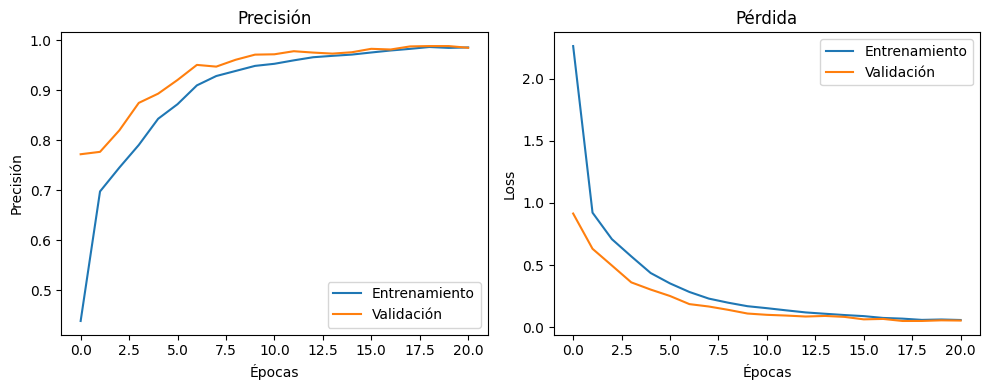

In [160]:
# Accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\junit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

<Figure size 1400x600 with 0 Axes>

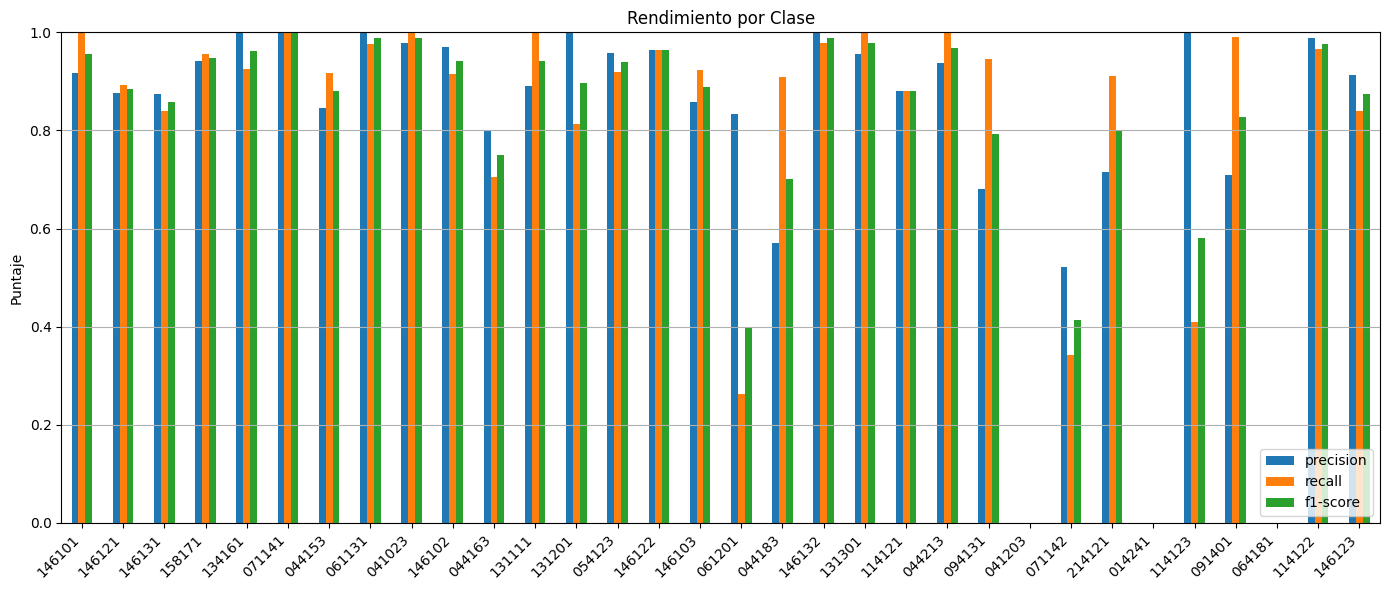

In [77]:
# Predecir sobre el set de prueba
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Generar el reporte de clasificación como diccionario
report = classification_report(y_test, y_pred, target_names=grdFiltro, output_dict=True)

# Convertir a DataFrame para graficar
df_report = pd.DataFrame(report).transpose()

# Filtrar solo las clases (descartar avg/total)
df_classes = df_report.iloc[:-3][['precision', 'recall', 'f1-score']]

# Graficar
plt.figure(figsize=(14, 6))
df_classes.plot(kind='bar', figsize=(14, 6))
plt.title('Rendimiento por Clase')
plt.ylabel('Puntaje')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


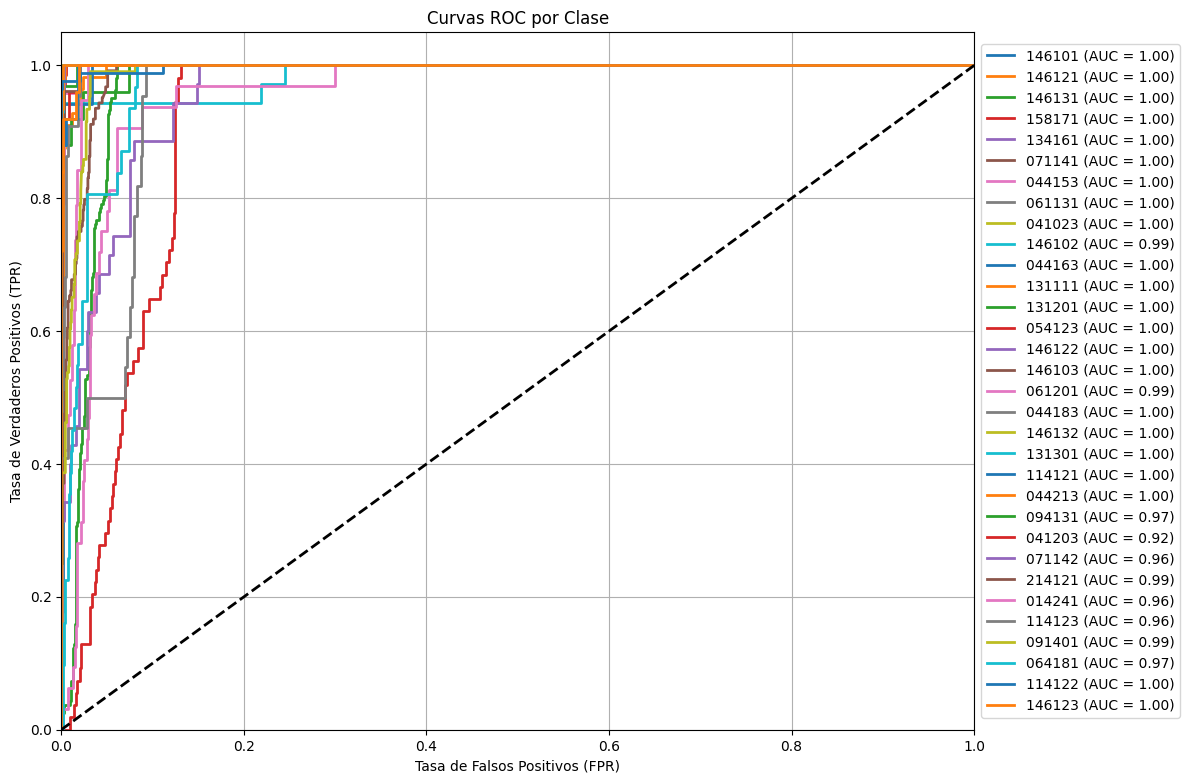

In [78]:
# Asegurar que y_test esté en formato one-hot
y_test_bin = label_binarize(y_test, classes=range(len(grdFiltro)))

# Obtener predicciones de probabilidad del modelo
y_score = model.predict(X_test)

# Inicializar el gráfico
plt.figure(figsize=(12, 8))

# Iterar sobre cada clase
for i in range(len(grdFiltro)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{grdFiltro[i]} (AUC = {roc_auc:.2f})')

# Línea diagonal (random)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configurar el gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC por Clase')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt.grid(True)
plt.tight_layout()
plt.show()


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


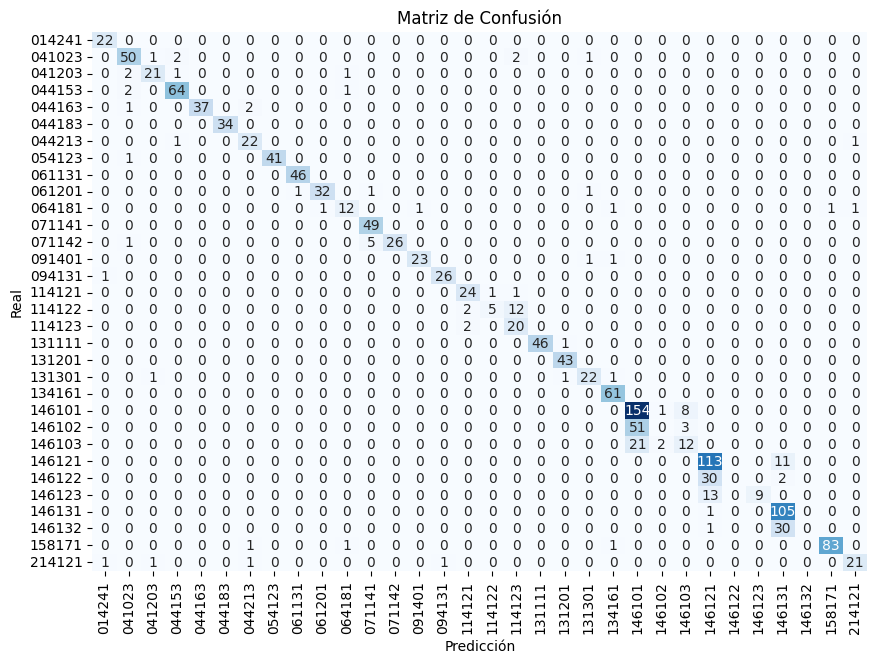

In [79]:
from sklearn.metrics import confusion_matrix

# Obtener las predicciones
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Convertir probabilidades a clase

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor con seaborn
plt.figure(figsize=(10, 7))  # Ajustar el tamaño de la figura
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_, cbar=False)

# Etiquetas y título
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

